# 特征分析

In [1]:
# 导入库
# 数据分析和探索
import pandas as pd
import numpy as np
import random as rnd

# 可视化
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 消除警告
import warnings
warnings.filterwarnings('ignore')

# 机器学习模型
from sklearn.linear_model import LogisticRegression # 逻辑回归模型
from sklearn.svm import SVC,LinearSVC # 线性分类支持向量机
from sklearn.ensemble import RandomForestClassifier # 随机森林分类模型
from sklearn.neighbors import KNeighborsClassifier # K近邻分类模型
from sklearn.naive_bayes import GaussianNB # 贝叶斯分类模型
from sklearn.linear_model import Perceptron # 感知机模型
from sklearn.linear_model import SGDClassifier # 梯度下降算法
from sklearn.tree import DecisionTreeClassifier # 决策树模型

In [2]:
# 导入数据
train_df = pd.read_csv('D:/Documents/Dataset/titanic/train.csv')
test_df = pd.read_csv('D:/Documents/Dataset/titanic/test.csv')
combine = [train_df,test_df]

In [3]:
# 探索数据，查看字段结构、类型
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# 查看各特征非空样本量及字段类型
train_df.info()
print("*"*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [6]:
# 查看数值类(int,float)特征的数据分布情况
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# 查看非数值类(object类型)特征的数据分布情况
train_df.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
# 创建船舱等级与生存量列联表
Pclass_Survived = pd.crosstab(train_df['Pclass'],train_df['Survived'])
Pclass_Survived

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


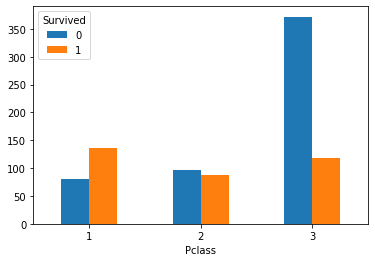

In [9]:
# 绘制船舱等级与生产量条形图
Pclass_Survived.plot(kind='bar')
plt.xticks(rotation=360)
plt.show()

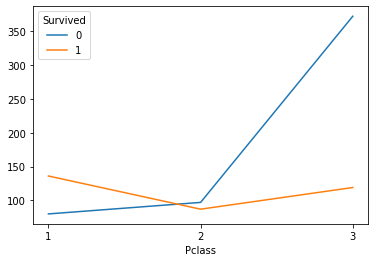

In [10]:
# 查看不同船舱等级生存率条形图
Pclass_Survived.plot(kind='line')
Pclass_Survived = train_df[["Pclass","Survived"]].groupby(["Pclass"],as_index=True).mean().sort_values(by="Pclass",ascending=False)
plt.xticks(range(1,4)[::1])
plt.show()

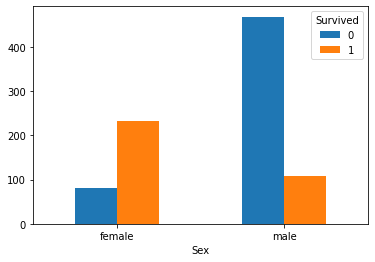

In [11]:
# 创建性别和生存量列联表
Sex_Survived = pd.crosstab(train_df['Sex'],train_df['Survived'])
Sex_Survived
Sex_Survived.plot(kind='bar')
plt.xticks(rotation=360)
plt.show() #横坐标0，1分别表示男性和女性

In [12]:
# 查看性别与生存率
train_df[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
# 处年龄缺失情况(用中位数代替缺失数据)
Agemedian=train_df['Age'].median() # 用年龄的中位数代替年龄缺失值
train_df.Age.fillna(Agemedian,inplace=True) # 在当前表填充缺失值
train_df.reset_index(inplace = True) #重置索引

Text(0.5, 1.0, 'Survived status by GroupAge')

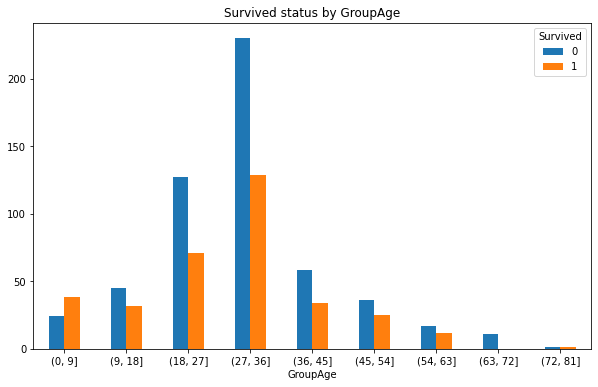

In [14]:
# 对年龄进行分组，绘制年龄与幸存数量条形图
bins = [0,9,18,27,36,45,54,63,72,81,90]
train_df['GroupAge'] = pd.cut(train_df.Age,bins)

GroupAge_Survived = pd.crosstab(train_df['GroupAge'],train_df['Survived'])
GroupAge_Survived.plot(kind='bar',figsize=(10,6))

plt.xticks(rotation=360)
plt.title('Survived status by GroupAge')

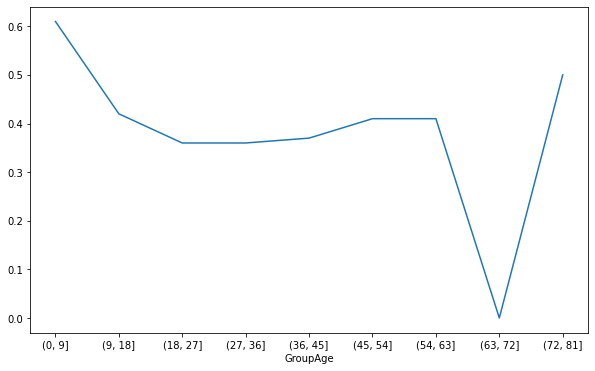

In [15]:
# 绘制不同年龄对应生存率折线图

# 不同年龄段幸存数
GroupAge_Survived_1 = GroupAge_Survived[1]
# 不同年龄段幸存率
GroupAge_all = GroupAge_Survived.sum(axis=1)
GroupAge_Survived_rate = round(GroupAge_Survived_1/GroupAge_all,2)
GroupAge_Survived_rate.plot(figsize=(10,6))
plt.show()

In [16]:
# 创建兄弟姐妹及配偶数量与生存量列联表
SibSp_Survived = pd.crosstab(train_df['SibSp'],train_df['Survived'])
SibSp_Survived

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


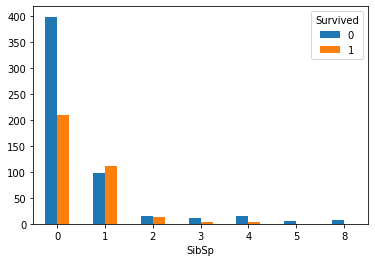

In [17]:
SibSp_Survived.plot(kind='bar')
plt.xticks(rotation=360)
plt.show()

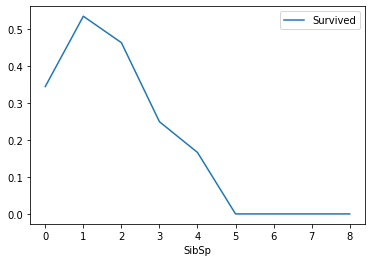

In [18]:
# 查看兄弟姐妹配偶数量和生存率的关系
SibSp_Survived = train_df[["SibSp","Survived"]].groupby(["SibSp"],as_index=True).mean().sort_values(by="SibSp")
SibSp_Survived.plot(kind='line')
plt.show()

In [19]:
# 创建父母与孩子数量与生存量列联表
Parch_Survived = pd.crosstab(train_df['Parch'],train_df['Survived'])
Parch_Survived

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


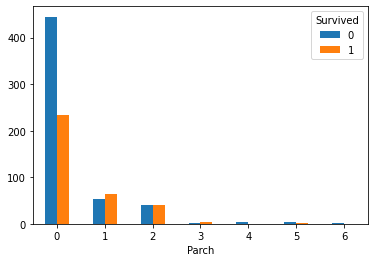

In [20]:
Parch_Survived.plot(kind='bar')
plt.xticks(rotation=360)
plt.show()

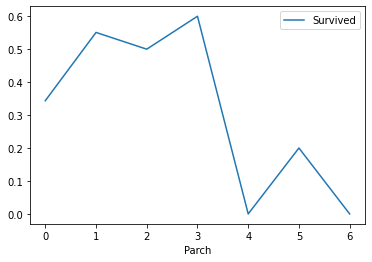

In [21]:
# 查看父母与孩子数与生存率的关系
Parch_Survived = train_df[["Parch","Survived"]].groupby(["Parch"],as_index=True).mean().sort_values(by="Parch")
Parch_Survived.plot(kind='line')
plt.show()

In [22]:
# 查看不同票价对应与幸存情况的关系

# 划分船票价格，创建不同的船票对应生存量列联表
bins = [0,60,120,180,240,300,360,420,480,540,600]
train_df['GroupFare']=pd.cut(train_df.Fare,bins,right=False)
GroupFare_Survived = pd.crosstab(train_df['GroupFare'],train_df['Survived'])
GroupFare_Survived

Survived,0,1
GroupFare,,
"[0, 60)",509,260
"[60, 120)",30,50
"[120, 180)",4,18
"[180, 240)",3,6
"[240, 300)",3,5
"[480, 540)",0,3


Text(0.5, 1.0, 'Survived status by GroupFare(Fare>=120)')

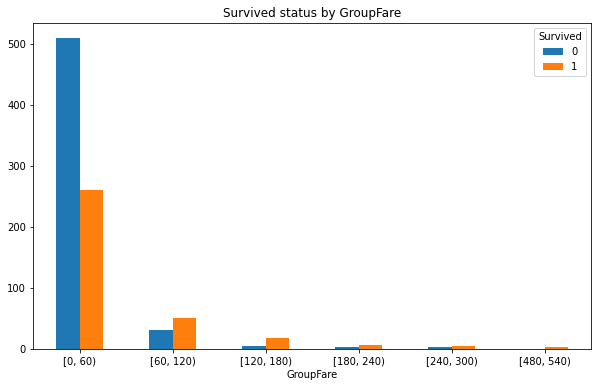

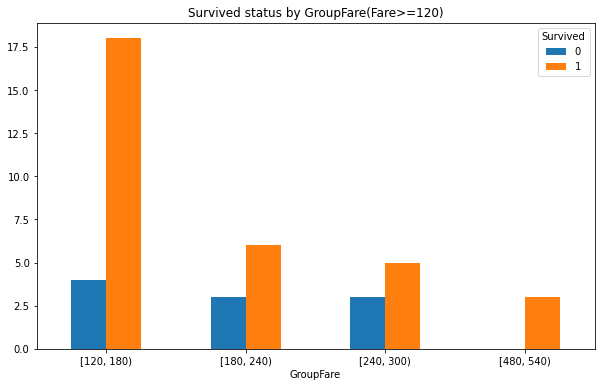

In [23]:
# 绘制不同船票价格对应幸存量簇状柱形图
GroupFare_Survived.plot(kind='bar',figsize=(10,6)) #绘制簇状柱形图
plt.xticks(rotation=360) #调整刻度
plt.title('Survived status by GroupFare')

GroupFare_Survived.iloc[2:].plot(kind='bar',figsize=(10,6))
plt.xticks(rotation=360)
plt.title('Survived status by GroupFare(Fare>=120)')

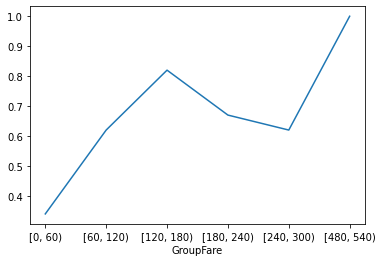

In [24]:
# 绘制不同票价对应生存率折线图

GroupFare_Survived_1 = GroupFare_Survived[1] #不同票价对应存活数
GroupFare_all = GroupFare_Survived.sum(axis=1)
GroupFare_Survived_rate = round(GroupFare_Survived_1/GroupFare_all,2)
GroupFare_Survived_rate.plot()
plt.show()

In [25]:
train_df=train_df.drop(["index","GroupAge","GroupFare"],axis=1)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 特征清洗

In [26]:
# 创建训练集和测试集姓名长度字段
train_df['NameLength'] = train_df['Name'].apply(len)
test_df['NameLength'] = test_df['Name'].apply(len)
# 使用名字字段作为特征之一是因为姓名带有该乘客的头衔，姓名越长对应头衔可能越长，相对社会地位可能较高

In [27]:
# 讲乘客是否有船舱分为两类
train_df['HasCabin'] = train_df["Cabin"].apply(lambda x: 0 if type(x)==float else 1)
test_df['HasCabin'] = test_df["Cabin"].apply(lambda x: 0 if type(x)==float else 1)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameLength,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,23,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,51,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,44,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,24,0


##### 删除Ticket和Cabin 字段
因为Ticket表示船票的名字，与乘客的生存率无关联。
删除Cabin是因为通过HasCabin来代替Cabin字段

In [28]:
train_df = train_df.drop(["Ticket","Cabin"],axis=1)
test_df = test_df.drop(["Ticket","Cabin"],axis=1)
combine = [train_df,test_df]
print(train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)

(891, 12) (418, 11) (891, 12) (418, 11)


In [29]:
# 根据姓名创建称号特征，会包含性别和阶层信息
# dataset.Name.str.extract('([A-Za-z]+)\.') 把空格开头、结尾的字符串提取出来
# 和性别匹配，看各类称号分别属于男or女，方便后续归类
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
pd.crosstab(train_df['Title'],train_df['Sex']).sort_values(by=["male","female"],ascending=False)

Sex,female,male
Title,,
Mr,0,517
Master,0,40
Dr,1,6
Rev,0,6
Col,0,2
Major,0,2
Capt,0,1
Don,0,1
Jonkheer,0,1


In [30]:
# 把称号归类为Mr,Miss,Mrs,Master,Rare_Male,Rare_Female(按男性和女性区分了Rare)
for dataset in combine:
    dataset["Title"] = dataset["Title"].replace(['Lady','Countess','Dona'],"Rare_Female")
    dataset["Title"] = dataset["Title"].replace(['Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer',],'Rare_Male')
    dataset["Title"] = dataset["Title"].replace('Mlle','Miss')
    dataset["Title"] = dataset["Title"].replace('Ms','Miss')
    dataset["Title"] = dataset["Title"].replace('Mme',"Miss")

##### 绘制不同称号对应的存活率

<BarContainer object of 6 artists>

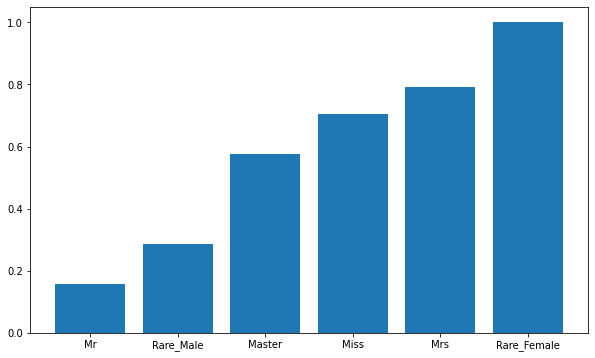

In [31]:
# 按Title汇总计算Survived均值，查看相关性
T_S = train_df[["Title","Survived"]].groupby(["Title"],as_index=False).mean().sort_values(by='Survived',ascending=True)
plt.figure(figsize=(10,6))
plt.bar(T_S['Title'],T_S['Survived'])

##### PS:称为Miss、Mrs、Rare_Female的乘客存活率居高，说明在逃生时，大家遵循女士优先的原则

In [32]:
# 将Title 特征映射成数值
title_mapping = {"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare_Female":5,"Rare_Male":6}
for dataset in combine :
    dataset["Title"] = dataset["Title"].map(title_mapping)
    dataset["Title"] = dataset["Title"].fillna(0)
    # 为了避免有空数据的常规操作·
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,NameLength,HasCabin,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,23,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,51,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,22,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,44,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,24,0,1


In [33]:
# 删除姓名字段
train_df = train_df.drop(["Name","PassengerId"],axis=1)
test_df = test_df.drop(['Name'],axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameLength,HasCabin,Title
0,0,3,male,22.0,1,0,7.2500,S,23,0,1
1,1,1,female,38.0,1,0,71.2833,C,51,1,3
2,1,3,female,26.0,0,0,7.9250,S,22,0,2
3,1,1,female,35.0,1,0,53.1000,S,44,1,3
4,0,3,male,35.0,0,0,8.0500,S,24,0,1


In [34]:
# 每次删除特征时都要重新combine
combine = [train_df,test_df]
combine[0].shape,combine[1].shape

((891, 11), (418, 11))

In [35]:
# 将性别字段转化为数值，女性为0，男性为1
for dataset in combine :
    dataset["Sex"]=dataset["Sex"].map({"female":1,"male":0}).astype(int) #加astype(int)避免类型错误
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameLength,HasCabin,Title
0,0,3,0,22.0,1,0,7.2500,S,23,0,1
1,1,1,1,38.0,1,0,71.2833,C,51,1,3
2,1,3,1,26.0,0,0,7.9250,S,22,0,2
3,1,1,1,35.0,1,0,53.1000,S,44,1,3
4,0,3,0,35.0,0,0,8.0500,S,24,0,1


In [36]:
guess_ages = np.zeros((6,3)) #对年龄字段进行空值处理
guess_ages 

# 对age年龄字段的空值
# 使用相同Pclass和Title的Age中位数来代替(对于中位数为空的组合，使用Title整体的中位数来代替)
for dataset in combine:
    #取六种组合的中位数
    for i in range(0,6):
        for j in range(0,3):
            guess_title_df = dataset[dataset["Title"]==i+1]["Age"].dropna()
            guess_df = dataset[(dataset["Title"]==i+1)&(dataset["Pclass"]==j+1)]['Age'].dropna()
            # age_mean = guess_df.mean()
            # age_std = guess_df.mean()
            # age_guess = rnd.uniform(age_mean - age_std,age_mean + age_std)
            age_guess = guess_df.median() if ~np.isnan(guess_df.median()) else guess_title_df.median()
            #print(i,j,guess_df.median(),guess_title_df.median(),age_guess)
            guess_ages[i,j]=int(age_guess/0.5+0.5)*0.5
    # 给满足6种情况的Age字段赋值
    for i in range(0,6):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Title == i+1) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)
    
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameLength,HasCabin,Title
0,0,3,0,22,1,0,7.2500,S,23,0,1
1,1,1,1,38,1,0,71.2833,C,51,1,3
2,1,3,1,26,0,0,7.9250,S,22,0,2
3,1,1,1,35,1,0,53.1000,S,44,1,3
4,0,3,0,35,0,0,8.0500,S,24,0,1


##### 划分年龄区间

In [37]:
# 创建年龄区间特征
# pd.cut是按值的大小均匀切分，每组值区间大小相同，但样本数可能不一致
# pd.qcut是按照样本在值上的分布频率切分，每组样本数相同
train_df['AgeBand'] = pd.qcut(train_df['Age'],8)
train_df.head() 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameLength,HasCabin,Title,AgeBand
0,0,3,0,22,1,0,7.2500,S,23,0,1,"(17.0, 22.0]"
1,1,1,1,38,1,0,71.2833,C,51,1,3,"(35.0, 45.0]"
2,1,3,1,26,0,0,7.9250,S,22,0,2,"(22.0, 27.0]"
3,1,1,1,35,1,0,53.1000,S,44,1,3,"(29.0, 35.0]"
4,0,3,0,35,0,0,8.0500,S,24,0,1,"(29.0, 35.0]"


In [38]:

train_df[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean().sort_values(by='AgeBand',ascending=True)

,AgeBand,Survived
0,"(-0.001, 17.0]",0.539823
1,"(17.0, 22.0]",0.313559
2,"(22.0, 27.0]",0.405660
3,"(27.0, 28.0]",0.289216
4,"(28.0, 29.0]",0.400000
5,"(29.0, 35.0]",0.451327
6,"(35.0, 45.0]",0.387931
7,"(45.0, 80.0]",0.376238


##### 将年龄区间转换为数值

In [39]:
# 把年龄按区间标准化为0到4
for dataset in combine:
    dataset.loc[dataset['Age'] <= 17,'Age'] = 0
    dataset.loc[(dataset['Age'] > 17) & (dataset['Age'] <= 21),'Age'] = 1
    dataset.loc[(dataset['Age'] > 21) & (dataset['Age'] <= 25),'Age'] = 2
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <= 26),'Age'] = 3
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 31),'Age'] = 4
    dataset.loc[(dataset['Age'] > 31) & (dataset['Age'] <= 36.5),'Age'] = 5
    dataset.loc[(dataset['Age'] > 36.5) & (dataset['Age'] <= 45),'Age'] = 6
    dataset.loc[(dataset['Age'] > 45),'Age'] = 7
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameLength,HasCabin,Title,AgeBand
0,0,3,0,2,1,0,7.2500,S,23,0,1,"(17.0, 22.0]"
1,1,1,1,6,1,0,71.2833,C,51,1,3,"(35.0, 45.0]"
2,1,3,1,3,0,0,7.9250,S,22,0,2,"(22.0, 27.0]"
3,1,1,1,5,1,0,53.1000,S,44,1,3,"(29.0, 35.0]"
4,0,3,0,5,0,0,8.0500,S,24,0,1,"(29.0, 35.0]"


In [40]:
# 移除AgeBand特征
train_df = train_df.drop('AgeBand',axis=1)
combine = [train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameLength,HasCabin,Title
0,0,3,0,2,1,0,7.2500,S,23,0,1
1,1,1,1,6,1,0,71.2833,C,51,1,3
2,1,3,1,3,0,0,7.9250,S,22,0,2
3,1,1,1,5,1,0,53.1000,S,44,1,3
4,0,3,0,5,0,0,8.0500,S,24,0,1


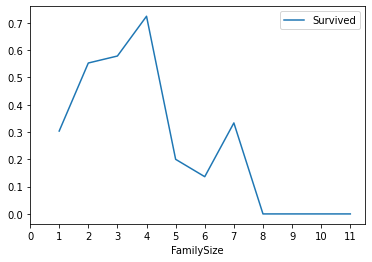

In [45]:
# 创建家庭规模FamilySize组合特征 +1是考虑本人
for dataset in combine:
    dataset["FamilySize"] = dataset["Parch"]+dataset["SibSp"] + 1
FamilySize_Survived = train_df[["FamilySize","Survived"]].groupby(["FamilySize"],as_index = True).mean().sort_values(by="FamilySize")
FamilySize_Survived.plot(kind="line")
plt.xticks(range(12)[::1])
plt.show()

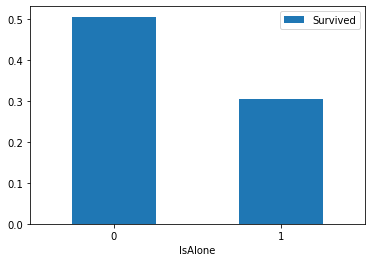

In [49]:
# 创建是否独自一人IsAlone特征
for dataset in combine : 
    dataset["IsAlone"] = 0
    dataset.loc[dataset["FamilySize"]==1,"IsAlone"]=1
IsAlone_Survived = train_df[["IsAlone","Survived"]].groupby(["IsAlone"],as_index=True).mean().sort_values(by="IsAlone")
IsAlone_Survived.plot(kind="bar")
plt.xticks(rotation=360)
plt.show()

In [50]:
# 移除Parch,Sibsp 字段
train_df = train_df.drop(["Parch","SibSp"],axis=1)
test_df = test_df.drop(["Parch","SibSp"],axis=1)
combine = [train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,NameLength,HasCabin,Title,FamilySize,IsAlone
0,0,3,0,2,7.2500,S,23,0,1,2,0
1,1,1,1,6,71.2833,C,51,1,3,2,0
2,1,3,1,3,7.9250,S,22,0,2,1,1
3,1,1,1,5,53.1000,S,44,1,3,2,0
4,0,3,0,5,8.0500,S,24,0,1,1,1


In [51]:
# 港口因素
# 给Embarked补充空值/获取上船最多的港口
freq_port = train_df["Embarked"].dropna().mode()[0]
freq_port

'S'

In [60]:
#处理缺失值(利用众数填充缺失值)
for dataset in combine :
    dataset["Embarked"] = dataset["Embarked"].fillna(freq_port)

# 创建列联表
Embarked_Survived = pd.crosstab(train_df['Embarked'],train_df['Survived'])
Embarked_Survived

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,219


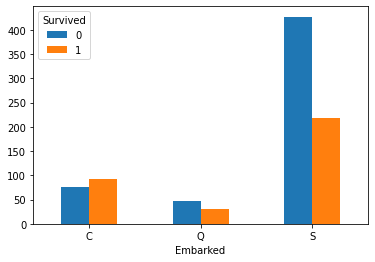

In [61]:
# 绘制不同港口对应的幸存量条形图
Embarked_Survived.plot(kind='bar')
plt.xticks(rotation=360)
plt.show()

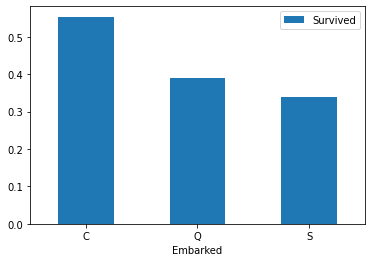

In [63]:
# 不同港口与幸存量的关系
Embarked_Survived = train_df[["Embarked","Survived"]].groupby(["Embarked"],as_index=True).mean().sort_values(by="Embarked",ascending=True)
Embarked_Survived.plot(kind="bar")
plt.xticks(rotation=360)
plt.show()

In [64]:
# 把Embarked数字化
for dataset in combine:
    dataset["Embarked"] = dataset["Embarked"].map({"S":0,"C":1,"Q":2}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,NameLength,HasCabin,Title,FamilySize,IsAlone
0,0,3,0,2,7.2500,0,23,0,1,2,0
1,1,1,1,6,71.2833,1,51,1,3,2,0
2,1,3,1,3,7.9250,0,22,0,2,1,1
3,1,1,1,5,53.1000,0,44,1,3,2,0
4,0,3,0,5,8.0500,0,24,0,1,1,1


In [65]:
# 给测试集中的Fare(票价)填充空值，使用中位数
test_df["Fare"].fillna(test_df["Fare"].dropna().median(),inplace=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          418 non-null    int32  
 4   Fare         418 non-null    float64
 5   Embarked     418 non-null    int32  
 6   NameLength   418 non-null    int64  
 7   HasCabin     418 non-null    int64  
 8   Title        418 non-null    int64  
 9   FamilySize   418 non-null    int64  
 10  IsAlone      418 non-null    int64  
dtypes: float64(1), int32(3), int64(7)
memory usage: 31.1 KB


In [66]:
# 创建FareBand区间特征
train_df["FareBand"] = pd.qcut(train_df["Fare"],4)
train_df[["FareBand","Survived"]].groupby(["FareBand"],as_index=False).mean().sort_values(by="FareBand",ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [67]:
# 将不同票价所在区间数字化

# 根据FareBand将Fare特征转化为序数值
for dataset in combine:
    dataset.loc[dataset['Fare'] <=7.91,'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454),'Fare'] = 1
    dataset.loc[(dataset['Fare'] >14.454) & (dataset['Fare'] <=31),'Fare'] = 2
    dataset.loc[dataset['Fare']>31,'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

# 移除FareBand
train_df = train_df.drop(['FareBand'],axis=1)
combine = [train_df,test_df]

train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,NameLength,HasCabin,Title,FamilySize,IsAlone
0,0,3,0,2,0,0,23,0,1,2,0
1,1,1,1,6,3,1,51,1,3,2,0
2,1,3,1,3,1,0,22,0,2,1,1
3,1,1,1,5,3,0,44,1,3,2,0
4,0,3,0,5,1,0,24,0,1,1,1
5,0,3,0,4,1,2,16,0,1,1,1
6,0,1,0,7,3,0,23,1,1,1,1
7,0,3,0,0,2,0,30,0,4,5,0
8,1,3,1,4,1,0,49,0,3,3,0
9,1,2,1,0,2,1,35,0,3,2,0


In [68]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,NameLength,HasCabin,Title,FamilySize,IsAlone
0,892,3,0,5,0,2,16,0,1,1,1
1,893,3,1,7,0,0,32,0,3,2,0
2,894,2,0,7,1,2,25,0,1,1,1
3,895,3,0,4,1,0,16,0,1,1,1
4,896,3,1,2,1,0,44,0,3,3,0


### 特征相关性可视化

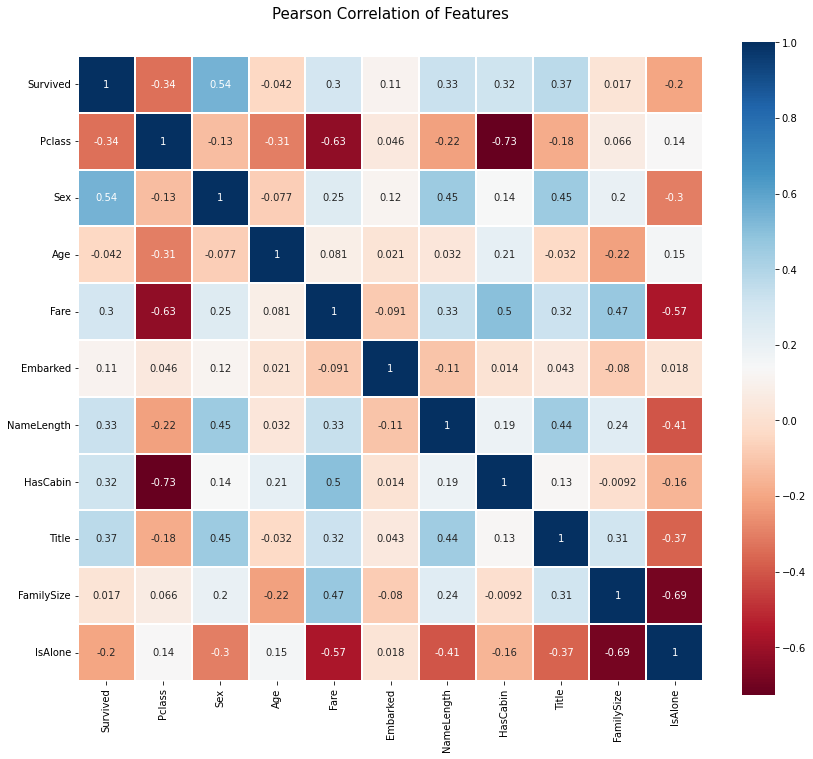

In [71]:
# 用seaborn的heatmap对特征之间的相关性进行可视化
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features',y=1.05,size=15)
sns.heatmap(train_df.astype(float).corr(),linewidths=0.1,vmax=1.0,
            square=True,cmap=colormap,linecolor='white',annot=True)
plt.show()

In [73]:
X_train = train_df.drop(['Survived'],axis=1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId",axis=1).copy()
X_train

,Pclass,Sex,Age,Fare,Embarked,NameLength,HasCabin,Title,FamilySize,IsAlone
0,3,0,2,0,0,23,0,1,2,0
1,1,1,6,3,1,51,1,3,2,0
2,3,1,3,1,0,22,0,2,1,1
3,1,1,5,3,0,44,1,3,2,0
4,3,0,5,1,0,24,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
886,2,0,4,1,0,21,0,6,1,1
887,1,1,1,2,0,28,1,2,1,1
888,3,1,4,2,0,40,0,2,4,0
889,1,0,3,2,1,21,1,1,1,1


In [74]:
Y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [75]:
X_test.head()

,Pclass,Sex,Age,Fare,Embarked,NameLength,HasCabin,Title,FamilySize,IsAlone
0,3,0,5,0,2,16,0,1,1,1
1,3,1,7,0,0,32,0,3,2,0
2,2,0,7,1,2,25,0,1,1,1
3,3,0,4,1,0,16,0,1,1,1
4,3,1,2,1,0,44,0,3,3,0


In [76]:
X_train.shape,Y_train.shape,X_test.shape

((891, 10), (891,), (418, 10))

# 建模和优化

In [79]:
# Logistic Regression 逻辑回归模型
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred_logreg = logreg.predict(X_test)
acc_log = round(logreg.score(X_train,Y_train)*100,2)

Y_pred_logreg # 预测结果

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [80]:
acc_log # 准确率

81.59

In [81]:
# 计算相关性
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation',ascending=False)

,Feature,Correlation
1,Sex,2.159708
6,HasCabin,0.712497
7,Title,0.339317
4,Embarked,0.309314
3,Fare,0.206934
5,NameLength,0.026302
2,Age,-0.194514
9,IsAlone,-0.329885
8,FamilySize,-0.432585
0,Pclass,-0.580091


In [82]:
# Support Vector Machines 支持向量机模型
svc = SVC()
svc.fit(X_train,Y_train)
Y_pred_svc = svc.predict(X_test)
acc_svc = round(svc.score(X_train,Y_train)*100,2)
Y_pred_svc

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [83]:
acc_svc

71.83

In [84]:
# KNN k近邻分类模型
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,Y_train)
Y_pred_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_train,Y_train)*100,2)
Y_pred_knn

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [85]:
acc_knn

87.54

In [88]:
# Gaussian Naive Bayes 贝叶斯分类算法
gaussian = GaussianNB()
gaussian.fit(X_train,Y_train)
Y_pred_gaussian = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train,Y_train)*100,2)
print(Y_pred_gaussian)
acc_gaussian

[0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0
 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1
 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0
 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0
 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0
 1 1 1 0 1 0 0 1 0 0 0]


79.01

In [90]:
# Perceptron 模型
perceptron = Perceptron()
perceptron.fit(X_train,Y_train)
Y_pred_perceptron = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train,Y_train)*100,2)
acc_perceptron

51.52

In [92]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train,Y_train)
Y_pred_linear_svc = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train,Y_train)*100,2)
print(Y_pred_linear_svc)
acc_linear_svc

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


80.7

In [95]:
# Stochasticc Gradient Descent 随机梯度下降
sgd = SGDClassifier()
sgd.fit(X_train,Y_train)
Y_pred_sgd = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train,Y_train)*100,2)
print(Y_pred_sgd)
acc_sgd

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 1 0 1 1 1 0 1 0 0 0]


80.92

In [97]:
# Decision Tree 决策树
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
Y_pred_decision_tree = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train,Y_train)*100,2)
print(Y_pred_decision_tree)
acc_decision_tree

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0
 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0
 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0
 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1
 1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 1]


97.64

In [100]:
# 随机森林算法
from sklearn.model_selection import train_test_split
X_all = train_df.drop(['Survived'],axis=1)
y_all = train_df['Survived']

num_test = 0.20
X_train,X_test,y_train,y_test = train_test_split(X_all,y_all,test_size=num_test,random_state=23)

# Random Forest
from sklearn.metrics import make_scorer,accuracy_score
from sklearn.model_selection import GridSearchCV
random_forest = RandomForestClassifier()

parameters = {'n_estimators':[4,6,9],
              'max_features':['log2','sqrt','auto'],
              'criterion':['entropy','gini'],
              'max_depth':[2,3,5,10],
              'min_samples_split':[2,3,5],
              'min_samples_leaf':[1,5,8]
             }
acc_scorer = make_scorer(accuracy_score)
grid_obj = GridSearchCV(random_forest,parameters,scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train,y_train)
clf = grid_obj.best_estimator_
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
acc_random_forest_split = accuracy_score(y_test,pred)
print(pred)
acc_random_forest_split

[1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1
 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0
 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1]


0.8044692737430168

In [106]:
# k-fold 交叉验证模型
from sklearn.model_selection import KFold 

def run_kfold(clf):
    kf = KFold(n_splits=10, random_state=233, shuffle=True)
    outcomes = []
    fold = 0
    for train_index,test_index in kf.split(train_df):
        fold += 1
        X_train,X_test = X_all.values[train_index],X_all.values[test_index]
        y_train,y_test = y_all.values[train_index],y_all.values[test_index]
        clf.fit(X_train,y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test,predictions)
        outcomes.append(accuracy)
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy:{0}".format(mean_outcome))

run_kfold(clf)

Mean Accuracy:0.823832709113608


In [107]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,NameLength,HasCabin,Title,FamilySize,IsAlone
0,892,3,0,5,0,2,16,0,1,1,1
1,893,3,1,7,0,0,32,0,3,2,0
2,894,2,0,7,1,2,25,0,1,1,1
3,895,3,0,4,1,0,16,0,1,1,1
4,896,3,1,2,1,0,44,0,3,3,0


### 模型结果比较

In [110]:
Y_pred_random_forest_split = clf.predict(test_df.drop("PassengerId",axis=1))

models = pd.DataFrame({
    'Model':['SVM','KNN','Logistic Regression','Random Forest',
             'Naive Bayes','Perceptron','SGD','Linear SVC','Decision Tree'],
    'Score':[acc_svc,acc_knn,acc_log,acc_random_forest_split,
             acc_gaussian,acc_perceptron,acc_sgd,acc_linear_svc,acc_decision_tree]
})
M_s = models.sort_values(by='Score',ascending=False)
M_s

,Model,Score
8,Decision Tree,97.640000
1,KNN,87.540000
2,Logistic Regression,81.590000
6,SGD,80.920000
7,Linear SVC,80.700000
4,Naive Bayes,79.010000
0,SVM,71.830000
5,Perceptron,51.520000
3,Random Forest,0.804469


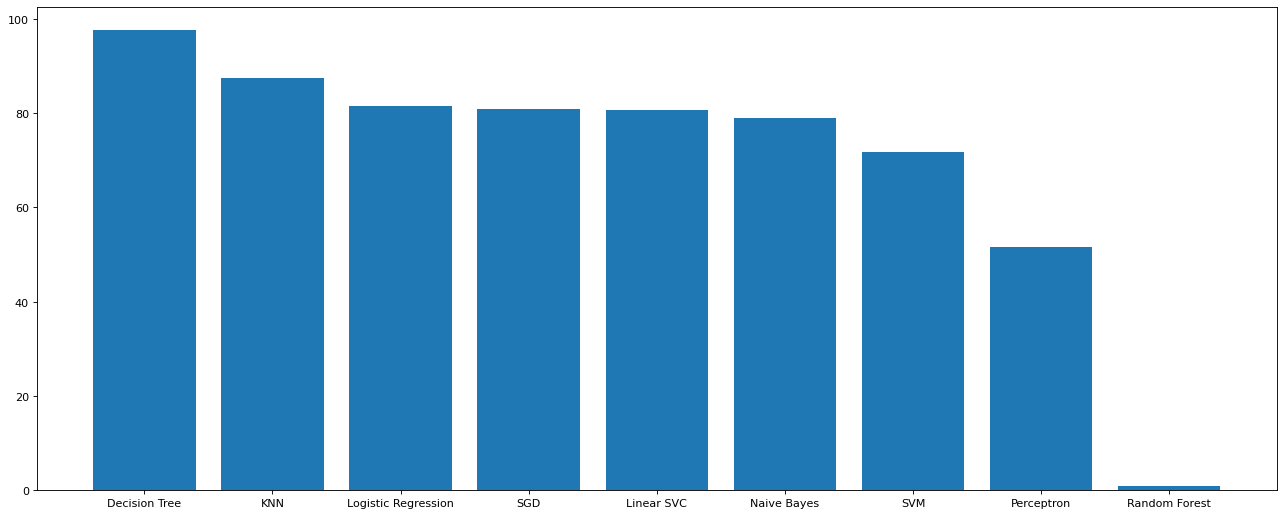

In [111]:
plt.figure(figsize=(20,8),dpi=80)
plt.bar(M_s['Model'],M_s['Score'])
plt.show()

# 保存结果

In [117]:
# 导入时间模块，利用时间戳作为文件名
import time

# 最后取随机森林模型的预测结果进行提交
tim = time.strftime('%Y%m%d%H%M',time.localtime(time.time()))
submission = pd.DataFrame({
    "PassengerId":test_df['PassengerId'],
    "Survived":Y_pred_random_forest_split
})
submission.to_csv('C:/Users/12645/Kaggle/submission_random_forest_' + tim + '.csv',index=False)

#保存决策树模型预测结果
tim = time.strftime('%Y%m%d%H%M',time.localtime(time.time()))
submission = pd.DataFrame({
    "PassengerId":test_df['PassengerId'],
    "Survived":Y_pred_decision_tree
})
submission.to_csv('C:/Users/12645/Kaggle/submission_decision_tree_' + tim + '.csv',index=False)

#保存KNN模型预测结果
tim = time.strftime('%Y%m%d%H%M',time.localtime(time.time()))
submission = pd.DataFrame({
    "PassengerId":test_df['PassengerId'],
    "Survived":Y_pred_knn
})
submission.to_csv('C:/Users/12645/Kaggle/submission_knn_' + tim + '.csv',index=False)

#保存SVC模型预测结果
tim = time.strftime('%Y%m%d%H%M',time.localtime(time.time()))
submission = pd.DataFrame({
    "PassengerId":test_df['PassengerId'],
    "Survived":Y_pred_svc
})
submission.to_csv('C:/Users/12645/Kaggle/submission_svc_' + tim + '.csv',index=False)

#保存SGD模型预测结果
tim = time.strftime('%Y%m%d%H%M',time.localtime(time.time()))
submission = pd.DataFrame({
    "PassengerId":test_df['PassengerId'],
    "Survived":Y_pred_sgd
})
submission.to_csv('C:/Users/12645/Kaggle/submission_sgd_' + tim + '.csv',index=False)

#保存Linear SVC模型预测结果
tim = time.strftime('%Y%m%d%H%M',time.localtime(time.time()))
submission = pd.DataFrame({
    "PassengerId":test_df['PassengerId'],
    "Survived":Y_pred_linear_svc
})
submission.to_csv('C:/Users/12645/Kaggle/submission_linear_svc_' + tim + '.csv',index=False)

#保存逻辑回归模型预测结果
tim = time.strftime('%Y%m%d%H%M',time.localtime(time.time()))
submission = pd.DataFrame({
    "PassengerId":test_df['PassengerId'],
    "Survived":Y_pred_logreg
})
submission.to_csv('C:/Users/12645/Kaggle/submission_logreg_' + tim + '.csv',index=False)

